In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

2024-02-05 23:23:10.903401: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class ResidualMLPClassifier:
    def __init__(self):
        self.model = None
        self.history = None

    def load_mnist_data(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        return x_train, y_train, x_test, y_test

    def ResMLP_get_input_val(self, x_train):
        width = x_train.shape[1]
        height = x_train.shape[2]
        input_val = width * height
        return input_val

    def ResMLP_scale_image_size(self, x_train, x_test, input_val):
        x_train = np.reshape(x_train, [-1, input_val])
        x_train = x_train.astype('float32') / 255

        x_test = np.reshape(x_test, [-1, input_val])
        x_test = x_test.astype('float32') / 255

        return x_train, x_test

    def ResMLP_preprocess_data(self, x_train, y_train, x_test, y_test):
        num_labels = len(np.unique(y_train))
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
        input_value = self.ResMLP_get_input_val(x_train)
        x_train, x_test = self.ResMLP_scale_image_size(x_train, x_test, input_value)

        return x_train, y_train, x_test, y_test, num_labels

    def build_ResMLP_model(self, input_size, hidden_units, num_labels, dropout):
        model = Sequential()
        model.add(Dense(hidden_units, input_dim=input_size))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))

        # Residual block
        residual_block = Sequential([
            Dense(hidden_units, activation='relu'),
            Dropout(dropout),
            Dense(hidden_units),
        ])

        # Adding the residual block with a skip connection
        model.add(residual_block)
        model.add(Dense(hidden_units))  # Shortcut connection
        model.add(Activation('relu'))

        model.add(Dense(num_labels))
        model.add(Activation('softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def train_ResMLP_model(self, model, x_train, y_train, epochs, batch_size):
        history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)
        self.history = history

    def evaluate_ResMLP_model(self, model, x_test, y_test, batch_size):
        _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
        return accuracy

    def plot_accuracy(self):
        if self.history is not None and 'accuracy' in self.history.history:
            plt.figure("Model Performance Output")
            plt.plot(self.history.history['accuracy'])
            plt.title('Model Accuracy over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.show()
        else:
            print("No training history available.")

Epoch 1/20
469/469 - 6s - loss: 0.4180 - accuracy: 0.8705 - 6s/epoch - 13ms/step
Epoch 2/20
469/469 - 4s - loss: 0.2091 - accuracy: 0.9379 - 4s/epoch - 8ms/step
Epoch 3/20
469/469 - 3s - loss: 0.1691 - accuracy: 0.9488 - 3s/epoch - 7ms/step
Epoch 4/20
469/469 - 3s - loss: 0.1474 - accuracy: 0.9551 - 3s/epoch - 5ms/step
Epoch 5/20
469/469 - 2s - loss: 0.1276 - accuracy: 0.9614 - 2s/epoch - 5ms/step
Epoch 6/20
469/469 - 3s - loss: 0.1185 - accuracy: 0.9646 - 3s/epoch - 7ms/step
Epoch 7/20
469/469 - 3s - loss: 0.1141 - accuracy: 0.9655 - 3s/epoch - 6ms/step
Epoch 8/20
469/469 - 3s - loss: 0.1069 - accuracy: 0.9675 - 3s/epoch - 7ms/step
Epoch 9/20
469/469 - 3s - loss: 0.1008 - accuracy: 0.9689 - 3s/epoch - 6ms/step
Epoch 10/20
469/469 - 3s - loss: 0.0940 - accuracy: 0.9714 - 3s/epoch - 6ms/step
Epoch 11/20
469/469 - 3s - loss: 0.0881 - accuracy: 0.9734 - 3s/epoch - 6ms/step
Epoch 12/20
469/469 - 3s - loss: 0.0836 - accuracy: 0.9741 - 3s/epoch - 6ms/step
Epoch 13/20
469/469 - 3s - loss: 0.0

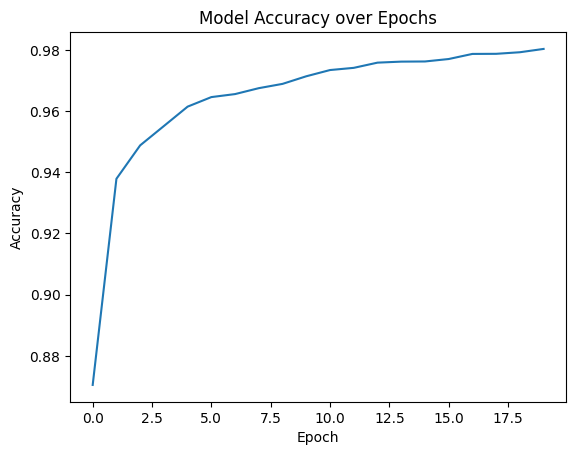

In [3]:
if __name__ == "__main__":
    resmlp_classifier = ResidualMLPClassifier()

    x_train, y_train, x_test, y_test = resmlp_classifier.load_mnist_data()
    input_value = resmlp_classifier.ResMLP_get_input_val(x_train)
    x_train, y_train, x_test, y_test, num_labels = resmlp_classifier.ResMLP_preprocess_data(x_train, y_train, x_test, y_test)

    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    
    resmlp_classifier.model = resmlp_classifier.build_ResMLP_model(input_value, hidden_units, num_labels, dropout)
    resmlp_classifier.train_ResMLP_model(resmlp_classifier.model, x_train, y_train, epochs=20, batch_size=batch_size)

    accuracy = resmlp_classifier.evaluate_ResMLP_model(resmlp_classifier.model, x_test, y_test, batch_size=batch_size)
    print("Accuracy: %.1f%%" % (100.0 * accuracy))

    resmlp_classifier.plot_accuracy()